# Modelo de Covid-19
### Elaborado por: L. Quiceno, C. Betancur
#### Instituto de Física-Universidad de Antioquia
#### Fecha: 16/04/20
#### Objetivo:
El proposito de este codigo es simular la propagacion de una pandemia y comparar los resultados cuando las personas estan fuera de sus casas y cuando hay distanciamiento social (cuarentena).


#### Notacion variables
S := Poblacion Suceptible

I := Poblacion infectada

R := Poblacion recuperada

#### Notacion parametros
Q := Parametro de poblacion en cuarentena

Beta := Probabilidad  de  contagio dado un encuentro entre infectados y suceptibles

Gama := Inverso del tiempo promedio de infeccion.

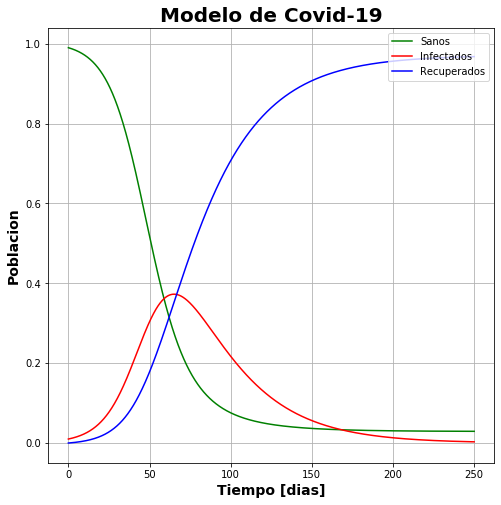

In [2]:
# Librerias necesarias
from matplotlib.pyplot import*


St0 =[0.99] # Sanos  (Tamaño de la poblacion)
It0 =[0.01] # Infectados (Paciente cero)
Rt0 =[0] # Recuperados
t = [0] # Tiempo
h=0.001 # Paso del tiempo

class Persona(): # Definir la clase
    
   
    # Evolucion de las ecuaciones diferenciales como metodos de la clase persona.
    
    def Sp(self,S,I,Beta=0.6,Gama=0.033,Q=0.2): 
        return -Q*Beta*S*I                    # Ecuacion diferencial para los sanos (metodo de la clase)
    
    def Ip(self,S,I,Beta=0.6,Gama=0.033,Q=0.2): 
        return Q*Beta*S*I-Gama*I              # Ecuacion diferencial para los Infectados (metodo de la clase)
    
    def Rp(self,S,I,Beta=0.6,Gama=0.033,Q=0.2): 
        return Gama*I                           # Ecuacion diferencial para los recuperados (metodo de la clase)

k = 0 # Variable que toma valores enteros y aumenta en una unidad cada iteracion (Paso de dias)
N=250 # Numero de dias que se desean analizar

while t[k] <= N:
    # Se crean los objetos de la clase Persona     
    Sano=Persona()
    Infe=Persona()
    Recu=Persona()

    
    #Solucion Metodo de Euler
    Rt0l=Rt0[k]+h*(Recu.Rp(St0[k],It0[k]))
    It0l=It0[k]+h*(Infe.Ip(St0[k],It0[k]))
    St0l=St0[k]+h*(Sano.Sp(St0[k],It0[k]))    

    # Agrega a las listas la evolucion
    St0.append(St0l)
    It0.append(It0l)
    Rt0.append(Rt0l)
    
    # Siguiente dia
    t[k] = t[k] + h
    t.append(t[k])
    k= k + 1
    
# Grafico del modelo del Covid-19
figure(figsize=(8,8)) # Tamaño de la figura
title('Modelo de Covid-19',fontsize=20, fontweight='bold')
xlabel('Tiempo [dias]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,St0,'-g',linewidth=1.5, label= 'Sanos') 
plot(t,It0,'-r',linewidth=1.5, label= 'Infectados')
plot(t,Rt0,'-b',linewidth=1.5, label= 'Recuperados')
grid(True)
legend(loc=1)